In [1]:
from util import *

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
Connected DB CINS_SMY - conn
Connected oraDW_ANALYTICS - conn_aly


In [2]:
cohort07_query = """WITH
T0 AS (
    SELECT * FROM CINS_REACTIVATED_CASA_CUST_STT_CHG_01072023),
T1 AS (
    SELECT * FROM CINS_REACTIVATED_CASA_SCORE_01072023),
T2 AS (
    SELECT *
        FROM (SELECT T0.*, T1.SCORE
        FROM T0 INNER JOIN T1 ON T0.CUSTOMER_CDE = T1.CUSTOMER_CDE
        WHERE REACTIVATED IS NOT NULL
        AND CUST_STT_LAG <= 1
        ORDER BY SCORE DESC)
    WHERE ROWNUM <= 500000),
T3 AS (
    SELECT *
    FROM DW_ANALYTICS.DW_CUST_PRODUCT_LOC_FCT
    WHERE SD_TKTT = 1),
T4 AS (
    SELECT T2.CUSTOMER_CDE, T3.PROCESS_DT AS RPT_DT,
        MAX(CASE
            WHEN T3.CUST_STATUS = 'HOAT DONG' THEN 2
            WHEN T3.CUST_STATUS = 'NGU DONG' THEN 1
            WHEN T3.CUST_STATUS = 'DONG BANG' THEN 0
        END) AS CUST_STT
    FROM T2 INNER JOIN T3 ON T2.CUSTOMER_CDE = T3.CUSTOMER_CDE
    WHERE PROCESS_DT = TO_DATE('31-12-2022', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-01-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('28-02-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-03-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-04-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-05-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-06-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-07-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-08-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-09-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-10-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-11-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-12-2023', 'DD-MM-YY')
    GROUP BY T2.CUSTOMER_CDE, T3.PROCESS_DT),
T5 AS (
    SELECT CUSTOMER_CDE, 
    -- RPT_DT
    LAG(RPT_DT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG9,
    LAG(RPT_DT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG8,
    LAG(RPT_DT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG7,
    LAG(RPT_DT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG6,
    LAG(RPT_DT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG5,
    LAG(RPT_DT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG4,
    LAG(RPT_DT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG3,
    LAG(RPT_DT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG2,
    LAG(RPT_DT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG1,
    RPT_DT, 
    LEAD(RPT_DT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD1, 
    LEAD(RPT_DT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD2,
    LEAD(RPT_DT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD3,
    LEAD(RPT_DT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD4,
    LEAD(RPT_DT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD5,
    LEAD(RPT_DT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD6,
    LEAD(RPT_DT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD7,
    LEAD(RPT_DT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD8,
    LEAD(RPT_DT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD9,
    -- STATUS
    LAG(CUST_STT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG9,
    LAG(CUST_STT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG8,
    LAG(CUST_STT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG7,
    LAG(CUST_STT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG6,
    LAG(CUST_STT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG5,
    LAG(CUST_STT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG4,
    LAG(CUST_STT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG3,
    LAG(CUST_STT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG2,
    LAG(CUST_STT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG1,
    CUST_STT, 
    LEAD(CUST_STT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD1,
    LEAD(CUST_STT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD2,
    LEAD(CUST_STT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD3,
    LEAD(CUST_STT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD4,
    LEAD(CUST_STT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD5,
    LEAD(CUST_STT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD6,
    LEAD(CUST_STT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD7,
    LEAD(CUST_STT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD8,
    LEAD(CUST_STT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD9
    FROM T4
),
T6 AS (
    SELECT * FROM T5
    WHERE RPT_DT = TO_DATE('30-06-2023', 'DD-MM-YY')),
T7 AS (
    SELECT T6.*, T2.SCORE
    FROM T6
    INNER JOIN T2 ON T6.CUSTOMER_CDE = T2.CUSTOMER_CDE
    ORDER BY T2.SCORE DESC
)
SELECT * 
FROM T7"""

In [3]:
cohort07 = download_or_reload('data/COHORT_07', cohort07_query)

Len 500000


In [4]:
cohort07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 40 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   CUSTOMER_CDE    500000 non-null  object        
 1   RPT_DT_LAG9     0 non-null       object        
 2   RPT_DT_LAG8     0 non-null       object        
 3   RPT_DT_LAG7     0 non-null       object        
 4   RPT_DT_LAG6     366872 non-null  datetime64[ns]
 5   RPT_DT_LAG5     385719 non-null  datetime64[ns]
 6   RPT_DT_LAG4     404826 non-null  datetime64[ns]
 7   RPT_DT_LAG3     426254 non-null  datetime64[ns]
 8   RPT_DT_LAG2     452895 non-null  datetime64[ns]
 9   RPT_DT_LAG1     481834 non-null  datetime64[ns]
 10  RPT_DT          500000 non-null  datetime64[ns]
 11  RPT_DT_LEAD1    499989 non-null  datetime64[ns]
 12  RPT_DT_LEAD2    499951 non-null  datetime64[ns]
 13  RPT_DT_LEAD3    499907 non-null  datetime64[ns]
 14  RPT_DT_LEAD4    499851 non-null  dat

In [5]:
cohort07

,CUSTOMER_CDE,RPT_DT_LAG9,RPT_DT_LAG8,RPT_DT_LAG7,RPT_DT_LAG6,RPT_DT_LAG5,RPT_DT_LAG4,RPT_DT_LAG3,RPT_DT_LAG2,RPT_DT_LAG1,...,CUST_STT_LEAD1,CUST_STT_LEAD2,CUST_STT_LEAD3,CUST_STT_LEAD4,CUST_STT_LEAD5,CUST_STT_LEAD6,CUST_STT_LEAD7,CUST_STT_LEAD8,CUST_STT_LEAD9,SCORE
0,18200010,None,None,None,NaT,NaT,NaT,NaT,NaT,NaT,...,2.0,2.0,2.0,2.0,2.0,2.0,None,None,None,0.980335
1,18200214,None,None,None,NaT,NaT,NaT,NaT,NaT,NaT,...,2.0,2.0,2.0,2.0,2.0,2.0,None,None,None,0.980335
2,18201437,None,None,None,NaT,NaT,NaT,NaT,NaT,NaT,...,2.0,2.0,2.0,2.0,2.0,2.0,None,None,None,0.980335
3,18194707,None,None,None,NaT,NaT,NaT,NaT,NaT,NaT,...,2.0,2.0,2.0,2.0,2.0,2.0,None,None,None,0.980335
4,18197670,None,None,None,NaT,NaT,NaT,NaT,NaT,NaT,...,2.0,2.0,2.0,2.0,2.0,2.0,None,None,None,0.980335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,12358711,None,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None,0.005944
499996,12374239,None,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None,0.005944
499997,12390382,None,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None,0.005944
499998,12393024,None,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None,0.005944


In [6]:
def analyze_cohort(cohort):
    len_cohort = len(cohort)
    data = []
    num_react = len(cohort[cohort['CUST_STT'] == 2])
    rpt_dt = cohort['RPT_DT'].tolist()[0]
    cohort = cohort[cohort['CUST_STT'] != 2]
    len_not_react = len(cohort)
    data.append((rpt_dt,num_react, len_not_react))
    if len(cohort) > 0:
        for i in range(1,10):
            if len(cohort) > 0:
                lead_mth = f'CUST_STT_LEAD{i}'
                num_react = len(cohort[cohort[lead_mth] == 2])
                rpt_dt = cohort[f'RPT_DT_LEAD{i}'].tolist()[0]
                cohort = cohort[cohort[lead_mth] != 2]
                len_not_react = len(cohort)
                data.append((rpt_dt,num_react, len_not_react))
    res_df = pd.DataFrame(data=data, columns=['RPT_DT', 'NUM_REACT', 'NUM_NOT_REACT'])
    res_df['PERC_REACT_PREV_MOB'] = res_df['NUM_REACT'].shift(-1) / res_df['NUM_NOT_REACT']
    res_df['PERC_REACT_PREV_MOB'] = res_df['PERC_REACT_PREV_MOB'].shift()
    res_df['CUMSUM'] = res_df['NUM_REACT'].cumsum()
    res_df['PERC'] = res_df['CUMSUM'] / len_cohort
    res_df = res_df[res_df['RPT_DT'].notnull()]
    ax = sns.barplot(res_df, x='RPT_DT', y='NUM_REACT')
    sns.lineplot(res_df['CUMSUM'], ax=ax)
    plt.show()
    return res_df

10000


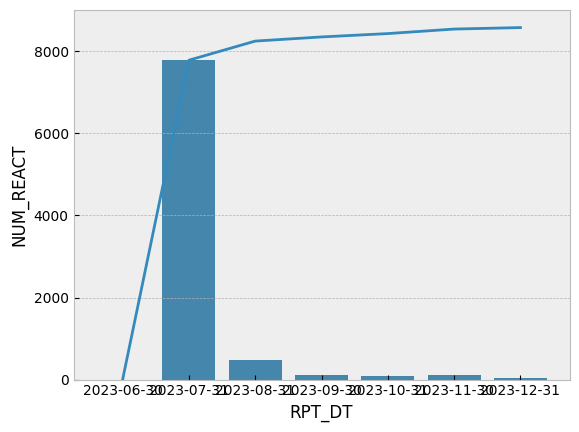

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-06-30,0,10000,NaN,0,0.0000
1,2023-07-31,7784,2216,0.778400,7784,0.7784
2,2023-08-31,466,1750,0.210289,8250,0.8250
3,2023-09-30,101,1649,0.057714,8351,0.8351
4,2023-10-31,82,1567,0.049727,8433,0.8433
5,2023-11-30,110,1457,0.070198,8543,0.8543
6,2023-12-31,36,1421,0.024708,8579,0.8579


50000


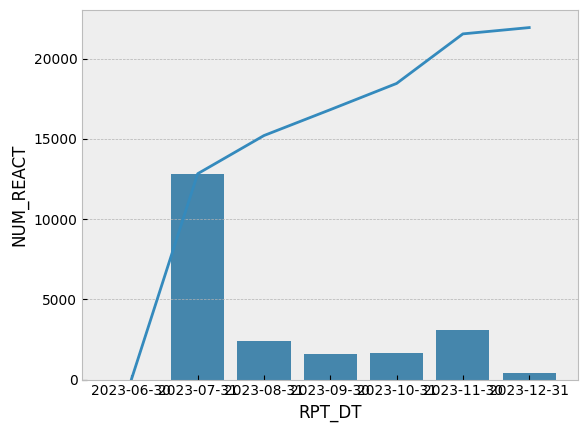

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-06-30,0,50000,NaN,0,0.00000
1,2023-07-31,12825,37175,0.256500,12825,0.25650
2,2023-08-31,2379,34796,0.063995,15204,0.30408
3,2023-09-30,1612,33184,0.046327,16816,0.33632
4,2023-10-31,1634,31550,0.049241,18450,0.36900
5,2023-11-30,3088,28462,0.097876,21538,0.43076
6,2023-12-31,392,28070,0.013773,21930,0.43860


100000


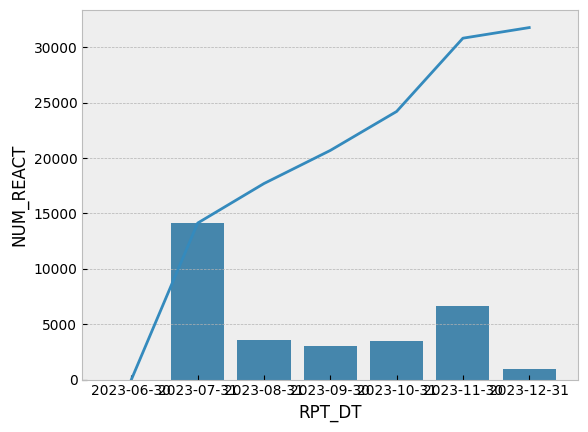

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-06-30,0,100000,NaN,0,0.00000
1,2023-07-31,14133,85867,0.141330,14133,0.14133
2,2023-08-31,3571,82296,0.041588,17704,0.17704
3,2023-09-30,2988,79308,0.036308,20692,0.20692
4,2023-10-31,3517,75791,0.044346,24209,0.24209
5,2023-11-30,6619,69172,0.087332,30828,0.30828
6,2023-12-31,958,68214,0.013850,31786,0.31786


200000


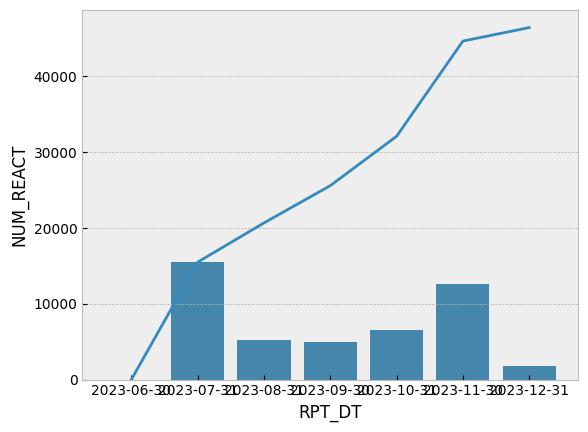

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-06-30,0,200000,NaN,0,0.000000
1,2023-07-31,15494,184506,0.077470,15494,0.077470
2,2023-08-31,5178,179328,0.028064,20672,0.103360
3,2023-09-30,4912,174416,0.027391,25584,0.127920
4,2023-10-31,6516,167900,0.037359,32100,0.160500
5,2023-11-30,12562,155338,0.074818,44662,0.223310
6,2023-12-31,1779,153559,0.011452,46441,0.232205


300000


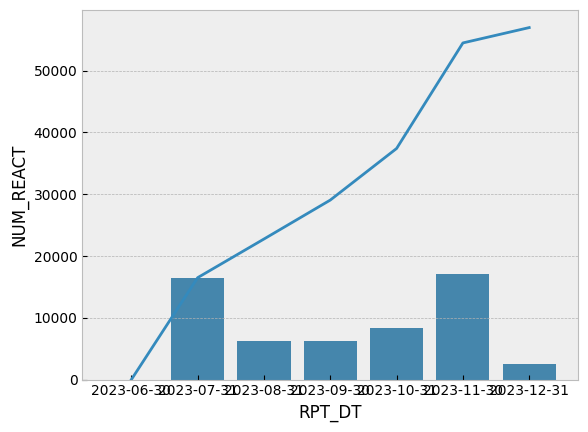

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-06-30,0,300000,NaN,0,0.000000
1,2023-07-31,16493,283507,0.054977,16493,0.054977
2,2023-08-31,6255,277252,0.022063,22748,0.075827
3,2023-09-30,6302,270950,0.022730,29050,0.096833
4,2023-10-31,8349,262601,0.030814,37399,0.124663
5,2023-11-30,17079,245522,0.065038,54478,0.181593
6,2023-12-31,2483,243039,0.010113,56961,0.189870


500000


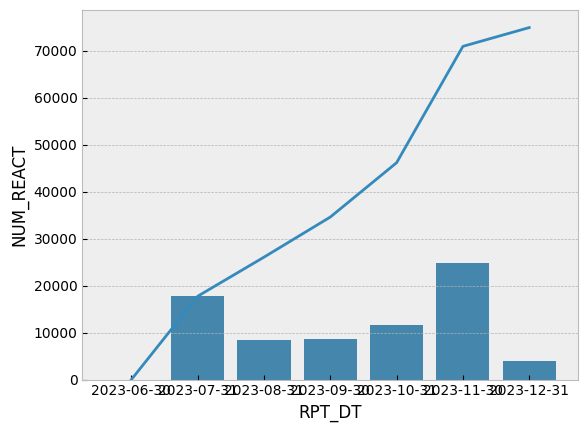

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-06-30,0,500000,NaN,0,0.000000
1,2023-07-31,17743,482257,0.035486,17743,0.035486
2,2023-08-31,8322,473935,0.017256,26065,0.052130
3,2023-09-30,8540,465395,0.018019,34605,0.069210
4,2023-10-31,11569,453826,0.024858,46174,0.092348
5,2023-11-30,24775,429051,0.054591,70949,0.141898
6,2023-12-31,3995,425056,0.009311,74944,0.149888


In [7]:
for limit in [10000, 50000, 100000, 200000, 300000, 500000]:
    print(limit)
    res_df = analyze_cohort(cohort07[:limit])
    display(res_df)

# Analyse Product 

In [8]:
prod_query = """WITH
T0 AS (
    SELECT * FROM CINS_REACTIVATED_CASA_CUST_STT_CHG_01072023),
T1 AS (
    SELECT * FROM CINS_REACTIVATED_CASA_SCORE_01072023),
T2 AS (
    SELECT *
        FROM (SELECT T0.*, T1.SCORE
        FROM T0 INNER JOIN T1 ON T0.CUSTOMER_CDE = T1.CUSTOMER_CDE
        WHERE REACTIVATED IS NOT NULL
        AND CUST_STT_LAG <= 1
        ORDER BY SCORE DESC)
    WHERE ROWNUM <= 500000),
T3 AS (
    SELECT T2.CUSTOMER_CDE, T2.RPT_DT, TA.CUST_STATUS, T2.REACTIVATED, T2.SCORE, 
    TA.BH, TA.IB, TA.MB, TA.PAY, TA.TKTT, TA.TK, TA.VAY, TA.SP_KHAC, TA.CREDIT, TA.PREPAID,
    TA.SD_BH, TA.SD_IB, TA.SD_MB, TA.SD_PAY, TA.SD_TKTT, TA.SD_TK, TA.SD_VAY, TA.SD_SP_KHAC, TA.SD_CREDIT, TA.SD_PREPAID, 
    TA.LASTEST_TRANS_DT
    FROM T2 INNER JOIN DW_ANALYTICS.DW_CUST_PRODUCT_LOC_FCT TA 
    ON T2.CUSTOMER_CDE = TA.CUSTOMER_CDE AND T2.RPT_DT = TA.PROCESS_DT
    )
SELECT * FROM T3
ORDER BY SCORE DESC"""

In [9]:
prod_df = download_or_reload('data/PRODUCT_REACTIVE_07', prod_query)

Len 573584


In [10]:
prod_df

,CUSTOMER_CDE,RPT_DT,CUST_STATUS,REACTIVATED,SCORE,BH,IB,MB,PAY,TKTT,...,SD_IB,SD_MB,SD_PAY,SD_TKTT,SD_TK,SD_VAY,SD_SP_KHAC,SD_CREDIT,SD_PREPAID,LASTEST_TRANS_DT
0,18199937,2023-07-31,HOAT DONG,1,0.980335,0,0,0,1,1,...,0,0,1,1,0,0,0,0,0,2023-08-01
1,18199966,2023-07-31,HOAT DONG,1,0.980335,0,0,0,1,1,...,0,0,1,1,0,0,0,0,0,2023-08-01
2,18199969,2023-07-31,HOAT DONG,1,0.980335,0,0,0,1,1,...,0,0,1,1,0,0,0,0,0,2023-08-01
3,18200210,2023-07-31,HOAT DONG,1,0.980335,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,2023-08-01
4,18200523,2023-07-31,HOAT DONG,1,0.980335,0,0,0,1,1,...,0,0,1,1,0,0,0,0,0,2023-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573579,12245582,2023-07-31,DONG BANG,0,0.005944,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,NaT
573580,12827971,2023-07-31,DONG BANG,0,0.005944,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,NaT
573581,12535067,2023-07-31,DONG BANG,0,0.005944,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,NaT
573582,12728199,2023-07-31,DONG BANG,0,0.005944,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,NaT


In [11]:
prod_df['CUST_STATUS'].value_counts()

NGU DONG     478935
DONG BANG     74857
HOAT DONG     19792
Name: CUST_STATUS, dtype: int64

In [12]:
prod_df[prod_df['CUST_STATUS']=='HOAT DONG'][['BH', 'IB', 'MB', 'PAY', 'TKTT', 'TK', 'VAY', 'SP_KHAC', 'CREDIT', 'PREPAID']]

,BH,IB,MB,PAY,TKTT,TK,VAY,SP_KHAC,CREDIT,PREPAID
0,0,0,0,1,1,0,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
573207,0,0,0,1,0,0,0,0,0,0
573289,0,0,1,0,1,0,0,0,0,0
573324,0,0,0,1,0,0,0,0,0,0
573325,0,0,0,0,1,0,0,0,1,0


In [13]:
active_df = prod_df[prod_df['CUST_STATUS']=='HOAT DONG']

In [14]:
prod_active_df = active_df[['BH', 'IB', 'MB', 'PAY', 'TKTT', 'TK', 'VAY', 'SP_KHAC', 'CREDIT', 'PREPAID']]
prod_active_df.sum(axis=0)

BH            53
IB            22
MB           714
PAY         6812
TKTT       17239
TK           226
VAY          151
SP_KHAC     3312
CREDIT      1356
PREPAID       10
dtype: int64

In [15]:
prod_active_df.sum(axis=0) / prod_active_df.sum(axis=0).sum() * 100

BH          0.177287
IB          0.073591
MB          2.388359
PAY        22.786419
TKTT       57.665161
TK          0.755979
VAY         0.505101
SP_KHAC    11.078776
CREDIT      4.535876
PREPAID     0.033450
dtype: float64